In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tqdm
import random

from experiments.npe.model import get_npe_model

In [2]:
with open('data/threecircles_npe_munk1.p', 'rb') as f:
    data = pickle.load(f)

In [3]:
train_x, train_y = data['train']

c = list(zip(train_x, train_y))
random.shuffle(c)
train_x, train_y = zip(*c)

val_x, val_y = data['val']

c = list(zip(val_x, val_y))
random.shuffle(c)
val_x, val_y = zip(*c)

In [4]:
def breakdown(X):
    return [
        np.array([x[0] for x in X]),
        np.array([x[1] for x in X]),
        np.array([x[2] for x in X]),
        np.array([x[3] for x in X]),
        np.array([x[4] for x in X]),
    ]

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interpn

def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins)
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False )

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, **kwargs )
    return ax

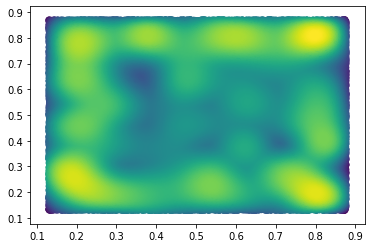

In [6]:
px = []
py = []

for t in range(len(train_x)):
    points_p = np.array([train_x[t][i][:2] for i in range(3)])
    points_n = np.array([train_x[t][i][2:] for i in range(3)])

#     plt.scatter(points_p[:, 0], points_p[:, 1])
#     plt.scatter(points_n[:, 0], points_n[:, 1])
#     plt.scatter([train_x[t][0][2:][0] + train_y[t][0]], [train_x[t][0][2:][1] + train_y[t][1]])

    # Position
    px.append(train_x[t][0][2:][0] + train_y[t][0])
    py.append(train_x[t][0][2:][1] + train_y[t][1])
    
    # Velocity
#     px.append(points_n[0][0] - points_p[0][0])
#     py.append(points_n[0][1] - points_p[0][1])
    
#     px.append(points_p[0][0])
#     py.append(points_p[0][1])
    
density_scatter(np.array(px), np.array(py), bins=10)

In [7]:
model = get_npe_model(max_pairs = 2)

opt = tf.keras.optimizers.RMSprop(learning_rate=0.0003)
model.compile(loss='mse', optimizer=opt)

In [8]:
b_train_x = breakdown(train_x)
b_val_x = breakdown(val_x)

In [ ]:
history = model.fit(b_train_x, np.array(train_y), validation_data=(b_val_x, np.array(val_y)), epochs=100, batch_size=50)

Train on 100000 samples, validate on 10000 samples
Epoch 1/100
 92350/100000 [==========================>...] - ETA: 1s - loss: 1.1511e-04

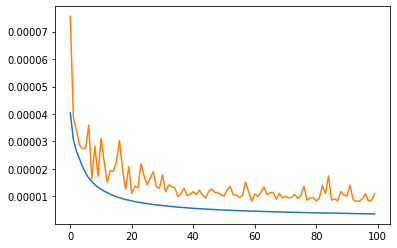

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [23]:
p = model.predict(b_val_x)

In [24]:
p[2]

array([-0.00657489, -0.0057289 ], dtype=float32)

In [25]:
val_x[2]

[array([0.20194447, 0.23575278, 0.19368893, 0.24649629]),
 array([0.1537517 , 0.49271911, 0.15284112, 0.46774421]),
 array([0.8361987 , 0.56710128, 0.8323285 , 0.58312286]),
 array([1.]),
 array([1.])]

In [26]:
val_y[2]

array([-0.00028811, -0.02485998])

In [21]:
b_train_x[0]

array([[0.78125   , 0.68164065, 0.82812503, 0.71484379],
       [0.84377438, 0.77206157, 0.79689935, 0.79418316],
       [0.77678211, 0.85975341, 0.76845586, 0.80389701],
       ...,
       [0.13660273, 0.82222201, 0.14349322, 0.81339978],
       [0.15727421, 0.79575531, 0.16416471, 0.78693308],
       [0.17794572, 0.76928861, 0.18483622, 0.76046638]])

In [88]:
from experiments.npe.simulate import show_simulation
show_simulation(model, width=1000, height=1000)

KeyboardInterrupt: 

In [22]:
model.save('model_zoo/npe4.h5')

In [6]:
model = tf.keras.models.load_model('model_zoo/npe4.h5')